In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
mat_path = './Batch_3115_Label_6_Frame_59/MTD_Result.mat'
data = scipy.io.loadmat(mat_path)

# 查看.mat文件中所有的变量
print("MAT文件中包含的所有变量:")
for key in data.keys():
    if not key.startswith('__'):  # 过滤掉元数据
        print(f"- {key}: {type(data[key])}, shape: {data[key].shape if hasattr(data[key], 'shape') else 'N/A'}")
        
print("\n" + "="*50)
        
# 检查MTD数据
mtd_data = data['data_proc_MTD_result']
print("MTD数据详细信息:")
print(f"数据类型: {type(mtd_data)}")
print(f"数据形状: {mtd_data.shape}")
print(f"数据范围: {np.min(mtd_data)} 到 {np.max(mtd_data)}")
print(f"是否为复数: {np.iscomplexobj(mtd_data)}")

MAT文件中包含的所有变量:
- data_proc_MTD_result: <class 'numpy.ndarray'>, shape: (31, 360)

MTD数据详细信息:
数据类型: <class 'numpy.ndarray'>
数据形状: (31, 360)
数据范围: (-31859.007900642544-21544.402488965876j) 到 (36626.7425675529-7705.552049445605j)
是否为复数: True


<Figure size 1200x800 with 0 Axes>

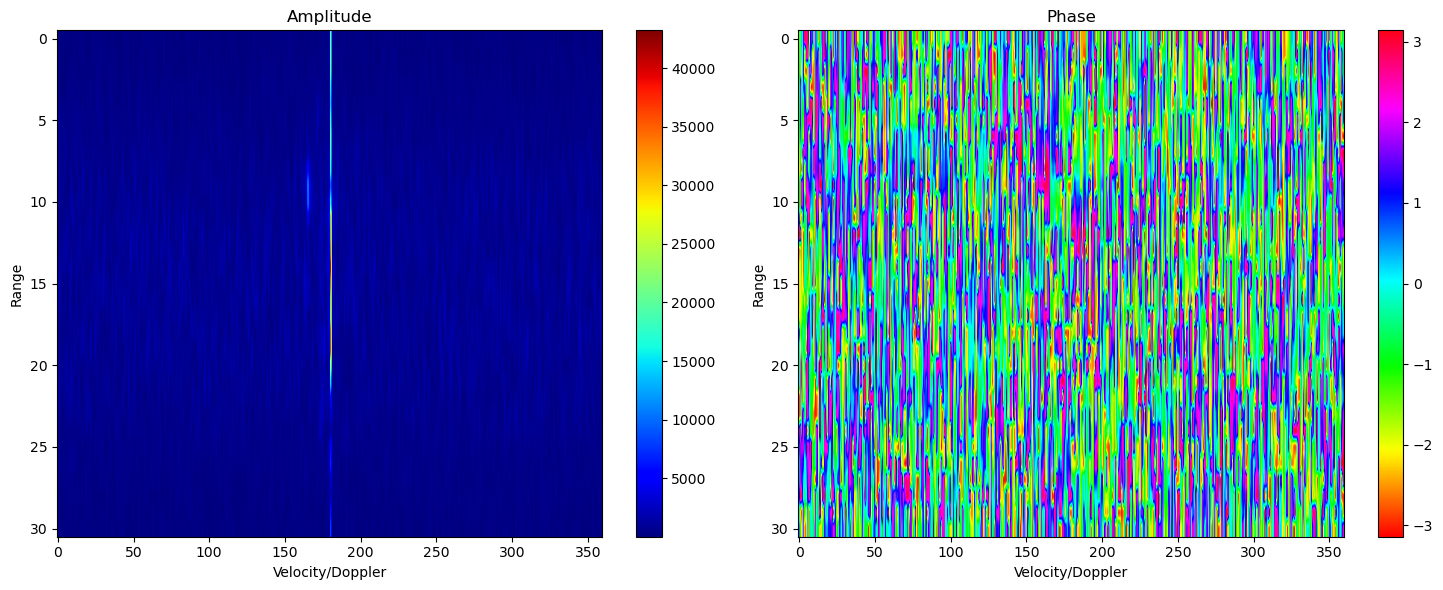

In [2]:
# 设置matplotlib在jupyter中内联显示
%matplotlib inline

plt.figure(figsize=(12, 8))

# 创建子图来显示不同视角
if len(mtd_data.shape) == 2:
    # 2D数据 - 显示幅度和相位
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 幅度图
    im1 = ax1.imshow(np.abs(mtd_data), aspect='auto', cmap='jet')
    ax1.set_title('Amplitude')
    ax1.set_xlabel('Velocity/Doppler')
    ax1.set_ylabel('Range')
    plt.colorbar(im1, ax=ax1)
    
    # 相位图（如果是复数）
    if np.iscomplexobj(mtd_data):
        im2 = ax2.imshow(np.angle(mtd_data), aspect='auto', cmap='hsv')
        ax2.set_title('Phase')
        ax2.set_xlabel('Velocity/Doppler')
        ax2.set_ylabel('Range')
        plt.colorbar(im2, ax=ax2)
    else:
        im2 = ax2.imshow(mtd_data, aspect='auto', cmap='jet')
        ax2.set_title('Raw Data')
        ax2.set_xlabel('Velocity/Doppler')
        ax2.set_ylabel('Range')
        plt.colorbar(im2, ax=ax2)

elif len(mtd_data.shape) == 3:
    # 3D数据 - 显示第一帧
    plt.imshow(np.abs(mtd_data[:,:,0]), aspect='auto', cmap='jet')
    plt.colorbar(label='Amplitude')
    plt.xlabel('Velocity/Doppler')
    plt.ylabel('Range')
    plt.title(f'MTD Result (Frame 1 of {mtd_data.shape[2]})')

plt.tight_layout()
plt.show()

In [3]:
# 查看数据的统计信息
print("数据统计信息:")
print(f"最大值: {np.max(np.abs(mtd_data))}")
print(f"最小值: {np.min(np.abs(mtd_data))}")
print(f"均值: {np.mean(np.abs(mtd_data))}")
print(f"标准差: {np.std(np.abs(mtd_data))}")

# 如果是3D数据，显示每一帧的信息
if len(mtd_data.shape) == 3:
    print(f"\n共有 {mtd_data.shape[2]} 帧数据")
    print("每帧最大值:")
    for i in range(min(5, mtd_data.shape[2])):  # 只显示前5帧
        print(f"  Frame {i+1}: {np.max(np.abs(mtd_data[:,:,i])):.3f}")

数据统计信息:
最大值: 43229.14410446538
最小值: 8.307537727245018
均值: 667.1141178065018
标准差: 1315.5463034717288


使用阈值 2.11e+08 检测到 21 个候选目标


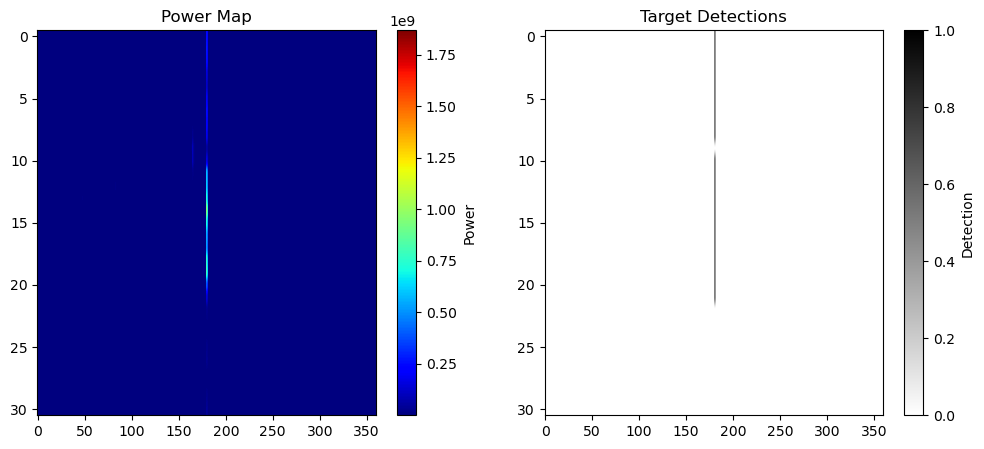

In [4]:
# 尝试简单的目标检测
# 设置检测阈值
power_map = np.abs(mtd_data)**2
mean_power = np.mean(power_map)
std_power = np.std(power_map)
threshold = mean_power + 5 * std_power  # 5-sigma检测

# 查找超过阈值的点
detections = power_map > threshold
print(f"使用阈值 {threshold:.2e} 检测到 {np.sum(detections)} 个候选目标")

# 可视化检测结果
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(power_map, aspect='auto', cmap='jet')
plt.colorbar(label='Power')
plt.title('Power Map')

plt.subplot(1, 2, 2)
plt.imshow(detections, aspect='auto', cmap='binary')
plt.colorbar(label='Detection')
plt.title('Target Detections')
plt.show()

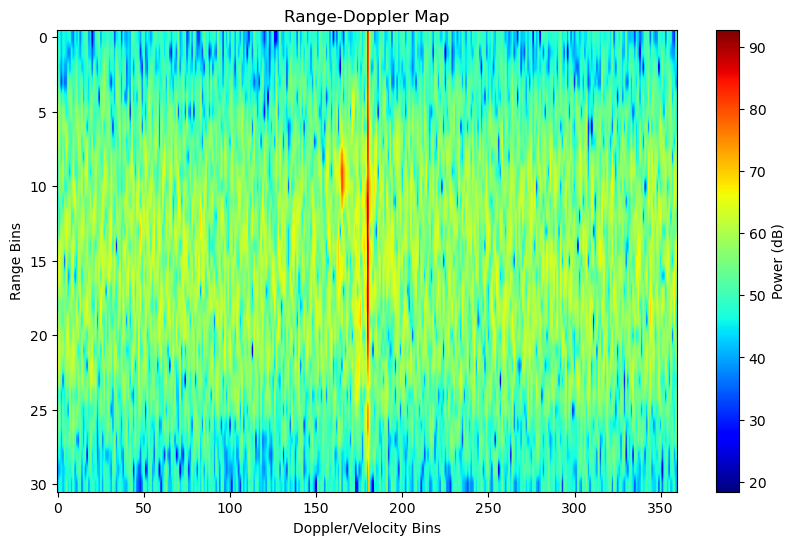

In [5]:
# 生成RD图 - 这就是您当前看到的MTD结果
plt.figure(figsize=(10, 6))
plt.imshow(20*np.log10(np.abs(mtd_data) + 1e-10), aspect='auto', cmap='jet')
plt.colorbar(label='Power (dB)')
plt.xlabel('Doppler/Velocity Bins')
plt.ylabel('Range Bins')
plt.title('Range-Doppler Map')
plt.show()

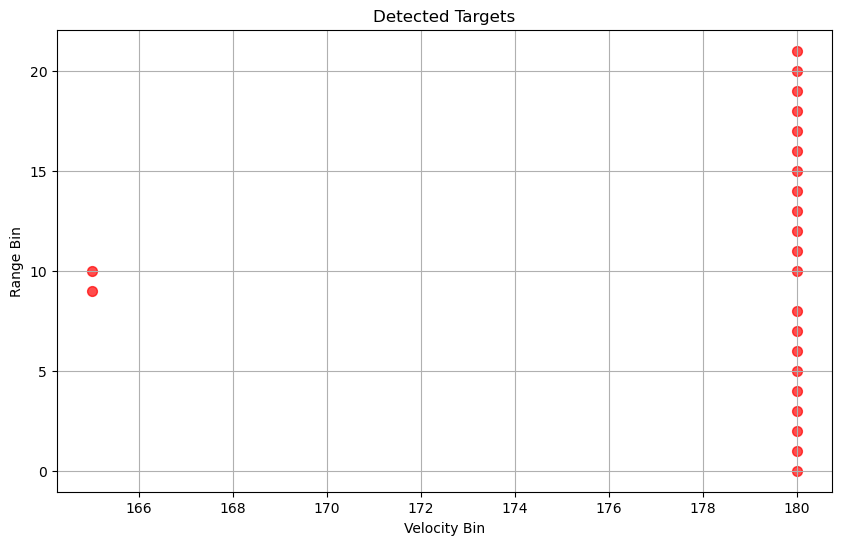

In [ ]:
# 如果有目标检测数据，可以生成点迹图
# 需要先从Target_Detection.mat中提取目标信息2
def plot_detections():
    # 假设有检测到的目标
    power_map = np.abs(mtd_data)**2
    threshold = np.mean(power_map) + 3*np.std(power_map)
    detections = np.where(power_map > threshold)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(detections[1], detections[0], c='red', s=50, alpha=0.7)
    plt.xlabel('Velocity Bin')
    plt.ylabel('Range Bin')
    plt.title('Detected Targets')
    plt.grid(True)
    plt.show()
    
plot_detections()